# Predicting survival chance for passengers (in test set) using ML algorithms. 
# Exploration of Titanic survival data

In [102]:
# Setting the environment and standard imports
import os
import pandas as pd
import numpy as np
os.getcwd()

'C:\\Users\\PBANE\\Titanic'

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= 'darkgrid')

In [104]:
# Data upload
trainSet = pd.read_csv('train.csv')
testSet = pd.read_csv('test.csv')

In [105]:
# Creating a copy of the training data and will work on this copy
titanic = trainSet.copy()

# Basic data exploration and overviewing data

In [106]:
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [107]:
titanic.shape

(891, 12)

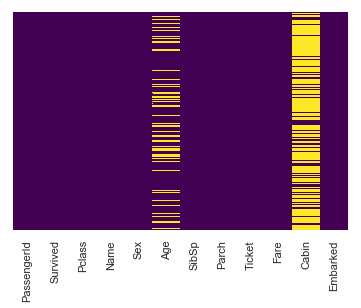

In [108]:
sns.heatmap(titanic.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

In [109]:
def newVarCreate(old):
    new = old.str.split('.', n = 1).str[0].str.split(',').str[-1]
    return(new)

In [110]:
titanic['Title'] = newVarCreate(titanic['Name'])

In [111]:
titanic.groupby('Title')[['PassengerId']].count()

,PassengerId
Title,
Capt,1
Col,2
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40
Miss,182


In [112]:
# Level reduction of the Title variable by combining the rare titles
def levelReducer(df):
    df = df.replace(to_replace= [' Capt', ' Col', ' Major', ' Don', ' Dr', ' Jonkheer', ' Lady', ' Sir', ' the Countess'], value= 'ReputedPersonel')
    df = df.replace(to_replace= [' Mlle', ' Ms', ' Miss'], value= 'Miss')
    df = df.replace(to_replace = [' Mme', ' Mrs'], value = 'Mrs')
    df = df.replace(to_replace= [' Rev'], value= 'Reverend')
    df = df.replace(to_replace= [' Mr'], value= 'Mr')
    return(df) 

In [113]:
titanic = levelReducer(titanic)

In [114]:
def cabinFix(df):
    Cabin = df['Cabin'].str.split().str.get(0).str.split('').str.get(1)
    Cabin = Cabin.fillna('NoCabin')
    df['Cabin'] = Cabin
    return(df['Cabin'])
    

In [115]:
titanic['Cabin'] = cabinFix(titanic)

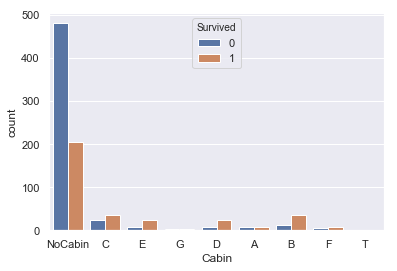

In [116]:
sns.countplot(x= 'Cabin', data= titanic, hue= 'Survived')

In [117]:
def cabinRegularizer(df):
    df['Cabin'] = df['Cabin'].replace(to_replace= ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], value= 'Cabin')
    return(df['Cabin'])

In [118]:
titanic['Cabin'] = cabinRegularizer(titanic)

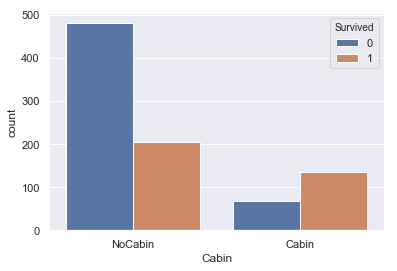

In [119]:
sns.countplot(x= 'Cabin', data= titanic, hue= 'Survived')

In [120]:
def travelPartner(df):
    df['travelWthFamily'] = 'Parents_Sibs'
    df.loc[(df['SibSp'] == 0) & (df['Parch'] == 0), 'travelWthFamily'] = 'Alone'
    df.loc[(df['SibSp'] == 0) & (df['Parch'] != 0), 'travelWthFamily'] = 'Parents'
    df.loc[(df['SibSp'] != 0) & (df['Parch'] == 0), 'travelWthFamily'] = 'Sibs'
    return(df['travelWthFamily'])    

In [121]:
titanic['travelWthFamily'] = travelPartner(titanic)

In [122]:
# Number of family members travelling together
def travelTogether(df):
    travelTogether = df['SibSp'] + df['Parch'] + 1
    return(travelTogether)

In [123]:
titanic['travelTogether'] = travelTogether(titanic)

In [125]:
titanic.groupby('Ticket')[['PassengerId']].count().head()

,PassengerId
Ticket,
110152,3
110413,3
110465,2
110564,1
110813,1


In [126]:
def sameTktPassenger(df):
    sameTktTravl = df.groupby('Ticket')[['PassengerId']].count().reset_index()
    sameTktTravl = sameTktTravl.rename(columns = {'PassengerId':'sameTktTravl'})
    df =pd.merge(df, sameTktTravl, on = 'Ticket', how = 'left')
    return(df)    

In [127]:
titanic = sameTktPassenger(titanic)

In [128]:
titanic['farePerTkt'] = titanic['Fare']/titanic['sameTktTravl']

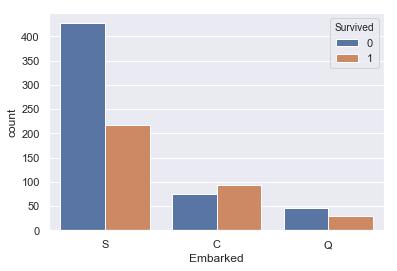

In [129]:
sns.countplot(x= 'Embarked', data= titanic, hue= 'Survived')

In [135]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Title,travelWthFamily,travelTogether,sameTktTravl,farePerTkt
0,0,3,male,22.0,7.2500,NoCabin,Mr,Sibs,2,1,7.2500
1,1,1,female,38.0,71.2833,Cabin,Mrs,Sibs,2,1,71.2833
2,1,3,female,26.0,7.9250,NoCabin,Miss,Alone,1,1,7.9250
3,1,1,female,35.0,53.1000,Cabin,Mrs,Sibs,2,2,26.5500
4,0,3,male,35.0,8.0500,NoCabin,Mr,Alone,1,1,8.0500


In [134]:
titanic =titanic.drop(['SibSp', 'Parch', 'Embarked'], axis = 1)

# Data Exploration and Visualization

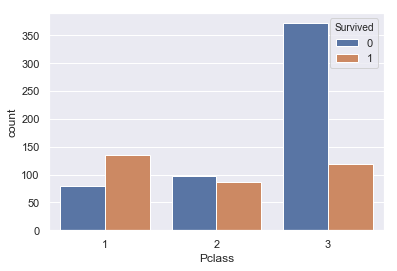

In [34]:
fig = plt.figure() 
sns.countplot(data= titanic, x= 'Pclass', hue= 'Survived')

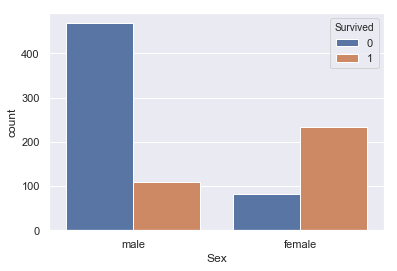

In [35]:
sns.countplot(data= titanic, x= 'Sex', hue= 'Survived')

C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


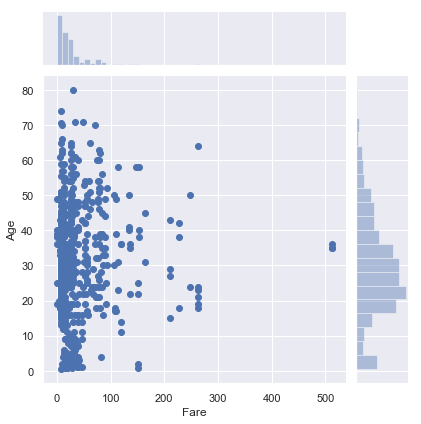

In [36]:
sns.jointplot(data= titanic, x= 'Fare', y= 'Age')

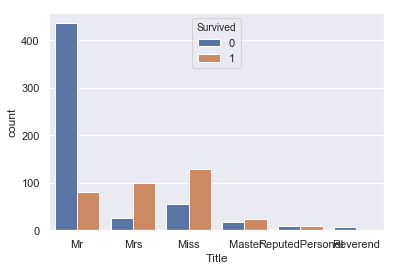

In [37]:
sns.countplot(data= titanic, x= 'Title', hue= 'Survived')

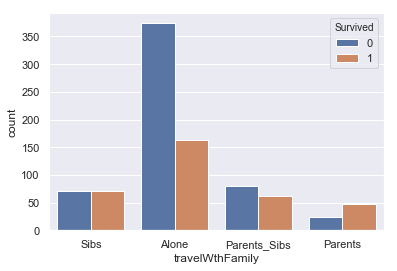

In [38]:
sns.countplot(data= titanic, x= 'travelWthFamily', hue= 'Survived')

# Predictor matrix and label creation

In [136]:
XTrain = titanic.drop('Survived', axis= 1)
yTrain = titanic['Survived']

In [74]:
# import sklearn.model_selection as model_selection
# XTrain, XTest, yTrain, yTest = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

In [137]:
XTrain.shape

(891, 10)

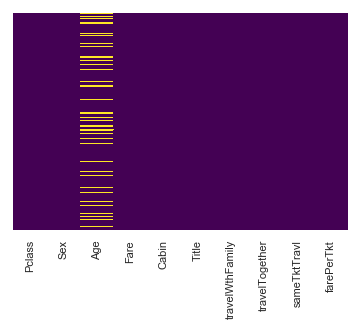

In [138]:
sns.heatmap(XTrain.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

In [139]:
XTrain.pivot_table('Age', aggfunc= 'mean', index= 'Title').reset_index()

,Title,Age
0,Master,4.574167
1,Miss,21.845638
2,Mr,32.368090
3,Mrs,35.788991
4,ReputedPersonel,46.437500
5,Reverend,43.166667


In [140]:
# Defining imputeAge()

def imputeAge(col):
    Age = col[0]
    Title = col[1]
    
    if pd.isnull(Age):
        if Title == ' Master':
            return 4
        elif Title == 'Miss':
            return 22
        elif Title == 'Mr':
            return 32
        elif Title == 'Mrs':
            return 36
        elif Title == 'ReputedPersonel':
            return 50
        elif Title == 'Reverend':
            return 46
    else:
        return Age              

In [141]:
XTrain['Age']= XTrain[['Age', 'Title']].apply(imputeAge, axis= 1)

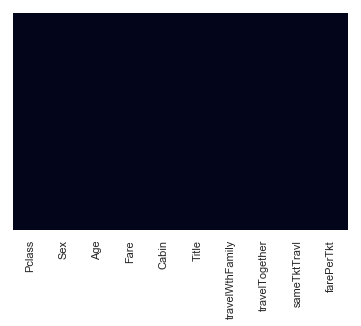

In [142]:
sns.heatmap(XTrain.isnull(), yticklabels= False, cbar= False)

In [49]:
XTrain['Embarked'] = XTrain['Embarked'].fillna(value= 'Unknown')

In [143]:
def ageGroup(df):
    ageGroup = pd.cut(df['Age'], [0, 5, 20, 50, 80], labels= ['Baby', 'Child_Tins', 'Adult', 'Old'], include_lowest= True)
    return(ageGroup)

In [144]:
XTrain['ageGroup'] = ageGroup(XTrain)

In [145]:
XTrain.head()

,Pclass,Sex,Age,Fare,Cabin,Title,travelWthFamily,travelTogether,sameTktTravl,farePerTkt,ageGroup
0,3,male,22.0,7.2500,NoCabin,Mr,Sibs,2,1,7.2500,Adult
1,1,female,38.0,71.2833,Cabin,Mrs,Sibs,2,1,71.2833,Adult
2,3,female,26.0,7.9250,NoCabin,Miss,Alone,1,1,7.9250,Adult
3,1,female,35.0,53.1000,Cabin,Mrs,Sibs,2,2,26.5500,Adult
4,3,male,35.0,8.0500,NoCabin,Mr,Alone,1,1,8.0500,Adult


In [146]:
# Predicter and Dependent variable matrix seperation

In [147]:
XTrain['Pclass']= XTrain['Pclass'].astype('category')

In [148]:
XTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
Pclass             891 non-null category
Sex                891 non-null object
Age                891 non-null float64
Fare               891 non-null float64
Cabin              891 non-null object
Title              891 non-null object
travelWthFamily    891 non-null object
travelTogether     891 non-null int64
sameTktTravl       891 non-null int64
farePerTkt         891 non-null float64
ageGroup           891 non-null category
dtypes: category(2), float64(3), int64(2), object(4)
memory usage: 111.6+ KB


In [149]:
XTrain = pd.get_dummies(XTrain, drop_first= True)
XTrain.head(2)


,Age,Fare,travelTogether,sameTktTravl,farePerTkt,Pclass_2,Pclass_3,Sex_male,Cabin_NoCabin,Title_Miss,Title_Mr,Title_Mrs,Title_ReputedPersonel,Title_Reverend,travelWthFamily_Parents,travelWthFamily_Parents_Sibs,travelWthFamily_Sibs,ageGroup_Child_Tins,ageGroup_Adult,ageGroup_Old
0,22.0,7.2500,2,1,7.2500,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
1,38.0,71.2833,2,1,71.2833,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [100]:
sns.scatterplot(XTrain)

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

# Model Building

# Logistic regression

In [150]:
from sklearn.linear_model import LogisticRegression

logClf = LogisticRegression(random_state= 42)
logClf = logClf.fit(XTrain, yTrain)

C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [151]:
import sklearn.model_selection as model_selection
score = model_selection.cross_val_score(logClf, XTrain, yTrain, cv= 10, scoring= 'accuracy')

C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

In [152]:
print(score)
print(score.mean())

[0.83333333 0.8        0.7752809  0.85393258 0.79775281 0.78651685
 0.83146067 0.80898876 0.86516854 0.86363636]
0.8216070820565203


# SGD Classification

In [153]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sgdClf = Pipeline((
    ('scaler', StandardScaler()),
    ('sgdClf', SGDClassifier(random_state = 42))
))

sgdClf.fit(XTrain, yTrain)

C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sgdClf', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [154]:
scoresSGD= model_selection.cross_val_score(sgdClf, XTrain, yTrain, cv= 10, scoring= 'accuracy')
print(scoresSGD)
print(scoresSGD.mean())

[0.66666667 0.77777778 0.69662921 0.79775281 0.85393258 0.73033708
 0.76404494 0.85393258 0.83146067 0.71590909]
0.7688443422993985


C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.

# SVM 

In [155]:
# SVM - Linear
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [156]:
svmClf = Pipeline((
('scaller', StandardScaler()),
('linearSVC', LinearSVC(C= 1, loss= 'hinge', random_state= 42)),
))

In [157]:
svmClf.fit(XTrain, yTrain)

C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaller', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [158]:
scoresSVM= model_selection.cross_val_score(svmClf, XTrain, yTrain, cv= 10, scoring= 'accuracy')
print(scoresSVM)
print(scoresSVM.mean())

C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\PBANE\AppData\Local

[0.82222222 0.85555556 0.7752809  0.87640449 0.82022472 0.80898876
 0.80898876 0.79775281 0.88764045 0.85227273]
0.8305331403926909


C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


# Polynomial SVM

In [159]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svmPolyClf = Pipeline((
    ('scaller', StandardScaler()),
    ('svmClf', SVC(kernel= 'poly', degree = 2, coef0 = 1, C= 1, random_state= 42))
))
svmPolyClf.fit(XTrain, yTrain)

C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaller', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svmClf', SVC(C=1, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False))])

In [160]:
scoresvmPoly = model_selection.cross_val_score(svmPolyClf, XTrain, yTrain, cv= 10, scoring= 'accuracy')
print(scoresvmPoly)
print(scoresvmPoly.mean())

C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Use

[0.82222222 0.85555556 0.75280899 0.87640449 0.83146067 0.80898876
 0.83146067 0.80898876 0.87640449 0.84090909]
0.8305203722619453


C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\PBANE\Ap

# Gaussian RBF

In [161]:
rbfSVMClf = Pipeline((
    ('scaller', StandardScaler()),
    ('svmClf', SVC(kernel= 'rbf', gamma= .1, C= 10000, random_state= 42))
    ))

rbfSVMClf.fit(XTrain, yTrain)

C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaller', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svmClf', SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])

In [162]:
scoreSVCrbfClf = model_selection.cross_val_score(rbfSVMClf, XTrain, yTrain, cv= 10, scoring= 'accuracy')
print(scoreSVCrbfClf)
print(scoreSVCrbfClf.mean())

C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Use

[0.73333333 0.75555556 0.69662921 0.78651685 0.84269663 0.80898876
 0.79775281 0.75280899 0.82022472 0.85227273]
0.7846779593689706


C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


# Decession Tree

In [163]:
from sklearn.tree import DecisionTreeClassifier

treeClf = DecisionTreeClassifier(max_depth= 10)
treeClf.fit(XTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [164]:
treeClf.score(XTrain, yTrain)

0.9382716049382716

In [165]:
## Cross validation
scoreTreeClf = model_selection.cross_val_score(treeClf, XTrain, yTrain, cv = 10, scoring= 'accuracy')
print(scoreTreeClf)
print(scoreTreeClf.mean())

[0.78888889 0.83333333 0.74157303 0.7752809  0.86516854 0.83146067
 0.80898876 0.82022472 0.79775281 0.82954545]
0.8092217114969923


# Ensemble Models

# Bagging classifier

In [166]:
from sklearn.ensemble import BaggingClassifier

bagClf = BaggingClassifier(base_estimator= DecisionTreeClassifier(), n_estimators= 500, bootstrap= True, n_jobs= -1, oob_score= True, random_state= 42)
bagClf = bagClf.fit(XTrain, yTrain)

In [167]:
bagClf.oob_score_

0.8260381593714927

In [168]:
scoresBagClf = model_selection.cross_val_score(bagClf, XTrain, yTrain, cv= 10, scoring= 'accuracy')
print(scoresBagClf)
print(scoresBagClf.mean())

[0.76666667 0.84444444 0.74157303 0.83146067 0.84269663 0.84269663
 0.83146067 0.80898876 0.86516854 0.85227273]
0.8227428782204063


# RandomForest

In [169]:
from sklearn.ensemble import RandomForestClassifier

forestClf = RandomForestClassifier(n_estimators= 500, n_jobs= -1, bootstrap= True, oob_score= True, random_state= 42)
forestClf = forestClf.fit(XTrain, yTrain)

In [170]:
forestClf.oob_score_

0.8271604938271605

In [171]:
scoresForest = model_selection.cross_val_score(forestClf, XTrain, yTrain, cv= 10, scoring= 'accuracy')
print(scoresForest)
print(scoresForest.mean())

[0.77777778 0.85555556 0.73033708 0.85393258 0.84269663 0.84269663
 0.83146067 0.7752809  0.85393258 0.86363636]
0.8227306775621382


In [173]:
for i in range(10, 500, 10):
    forestClf = RandomForestClassifier(n_estimators= i, n_jobs= -1, oob_score= True, random_state= 42)
    forestClf.fit(XTrain, yTrain)
    oob = forestClf.oob_score_
    print("for n_estimatores = "+str(i))
    print("oob score is = "+str(oob))
    print("==============================================================================")


C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


for n_estimatores = 10
oob score is = 0.7890011223344556
for n_estimatores = 20
oob score is = 0.8058361391694725
for n_estimatores = 30
oob score is = 0.8181818181818182
for n_estimatores = 40
oob score is = 0.8125701459034792
for n_estimatores = 50
oob score is = 0.8148148148148148
for n_estimatores = 60
oob score is = 0.8170594837261503
for n_estimatores = 70
oob score is = 0.8181818181818182
for n_estimatores = 80
oob score is = 0.8170594837261503
for n_estimatores = 90
oob score is = 0.8181818181818182
for n_estimatores = 100
oob score is = 0.8204264870931538
for n_estimatores = 110
oob score is = 0.819304152637486
for n_estimatores = 120
oob score is = 0.8125701459034792
for n_estimatores = 130
oob score is = 0.8125701459034792
for n_estimatores = 140
oob score is = 0.8181818181818182
for n_estimatores = 150
oob score is = 0.8148148148148148
for n_estimatores = 160
oob score is = 0.8181818181818182
for n_estimatores = 170
oob score is = 0.819304152637486
for n_estimatores = 180
o

# Extratree Classifier

In [174]:
from sklearn.ensemble import ExtraTreesClassifier

eTreeClf= ExtraTreesClassifier(n_estimators= 500, n_jobs= -1, bootstrap= True, oob_score= True, random_state= 42)
eTreeClf.fit(XTrain, yTrain)

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [175]:
eTreeClf.oob_score_

0.819304152637486

In [176]:
scoreET= model_selection.cross_val_score(eTreeClf, XTrain, yTrain, cv= 10, scoring= 'accuracy')
print(scoreET)
print(scoreET.mean())

[0.8        0.85555556 0.74157303 0.80898876 0.83146067 0.85393258
 0.82022472 0.7752809  0.87640449 0.85227273]
0.8215693451367608


# Voting Classifier

In [181]:
from sklearn.ensemble import VotingClassifier

logClf = logClf
linearSVM = svmClf
polySVM = svmPolyClf
treeClf = treeClf
bagClf = bagClf
forestClf = forestClf
eTreeClf = eTreeClf
aBoostClf = aBoostClf
gBoostClf = gBoostClf


votinfClf = VotingClassifier(
    estimators= [('logClf', logClf),
                 ('linearSVM', linearSVM),
                 ('bagClf', bagClf),
                 ('forestClf', forestClf),
                 ('eTreeClf', eTreeClf),
                 ('polySVM', polySVM),
                 ('gBoostClf', gBoostClf),
                ('aBoostClf', aBoostClf)], voting= 'hard')

In [182]:
votinfClf.fit(XTrain, yTrain)

C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\PBANE\AppData\Local\Continuu

VotingClassifier(estimators=[('logClf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('linearSVM',...hm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=500, random_state=42))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [183]:
scoreV= model_selection.cross_val_score(votinfClf, XTrain, yTrain, cv= 10, scoring= 'accuracy')

C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\PBANE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\PBANE\AppData\Local\Continuu

In [184]:
scoreV.mean()

0.8327925320621951

# AdaBoost

In [177]:
from sklearn.ensemble import AdaBoostClassifier

aBoostClf= AdaBoostClassifier(learning_rate= .1, n_estimators= 500, random_state= 42)
aBoostClf= aBoostClf.fit(XTrain, yTrain)

In [178]:
scoresAB= model_selection.cross_val_score(aBoostClf, XTrain, yTrain, cv= 10)
print(scoresAB)
print(scoresAB.mean())

[0.76666667 0.8        0.79775281 0.86516854 0.84269663 0.78651685
 0.85393258 0.84269663 0.85393258 0.84090909]
0.8250272386789241


# Gradiant Boost

In [179]:
from sklearn.ensemble import GradientBoostingClassifier

gBoostClf= GradientBoostingClassifier(learning_rate= .1, n_estimators= 500, random_state= 42)
gBoostClf.fit(XTrain, yTrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [180]:
scoreGB= model_selection.cross_val_score(gBoostClf, XTrain, yTrain, cv= 10, scoring= 'accuracy')
print(scoreGB)
print(scoreGB.mean())

[0.81111111 0.84444444 0.75280899 0.83146067 0.84269663 0.83146067
 0.86516854 0.84269663 0.84269663 0.80681818]
0.8271362501418681


In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [52]:
dataset = titanicOriginal.copy()
dataset.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

# Read data from Titanic dataset.
titanic_url = ('https://raw.githubusercontent.com/amueller/'
               'scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
data = pd.read_csv(titanic_url)

# We will train our classifier with the following features:
# Numeric Features:
# - age: float.
# - fare: float.
# Categorical Features:
# - embarked: categories encoded as strings {'C', 'S', 'Q'}.
# - sex: categories encoded as strings {'female', 'male'}.
# - pclass: ordinal integers {1, 2, 3}.

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [67]:
a = preprocessor.fit_transform(data)

In [68]:
pd.DataFrame(a)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.039005,3.442584,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-2.215952,2.286639,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-2.131977,2.286639,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.038512,2.286639,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-0.349075,2.286639,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5,1.433827,-0.130140,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
6,2.596589,0.863800,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.736169,-0.643464,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
8,1.821414,0.351847,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
9,3.216729,0.313661,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [253]:
XTrainDummy = pd.get_dummies(XTrain)

In [254]:
XTrainDummy

,Pclass,Age,SibSp,Parch,Fare,travelTogether,sameTktTravl,Sex_female,Sex_male,Cabin_Cabin,...,travelWthFamily_Alone,travelWthFamily_Parents,travelWthFamily_Parents_Sibs,travelWthFamily_Sibs,genderClass_female_1,genderClass_female_2,genderClass_female_3,genderClass_male_1,genderClass_male_2,genderClass_male_3
331,1,45.50,0,0,28.5000,1,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
733,2,23.00,0,0,13.0000,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
382,3,32.00,0,0,7.9250,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
704,3,26.00,1,0,7.8542,2,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
813,3,6.00,4,2,31.2750,7,7,1,0,0,...,0,0,1,0,0,0,1,0,0,0
118,1,24.00,0,1,247.5208,2,2,0,1,1,...,0,1,0,0,0,0,0,1,0,0
536,1,45.00,0,0,26.5500,1,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
361,2,29.00,1,0,27.7208,2,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
29,3,32.21,0,0,7.8958,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
55,1,32.21,0,0,35.5000,1,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
